# Exercises chapter 3

Help from [https://jmgirard.com/statistical-rethinking-ch3/](https://jmgirard.com/statistical-rethinking-ch3/) and [https://github.com/jffist/statistical-rethinking-solutions/blob/master/ch03_hw.R](https://github.com/jffist/statistical-rethinking-solutions/blob/master/ch03_hw.R).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pymc3 as pm

## Py code 3.27

Code and data setup for the exercises

In [2]:
p_grid = np.linspace(0, 1, num=1000)
prior = np.ones(1000)
likelihood = stats.binom.pmf(k=6, n=9, p=p_grid)
posterior = likelihood * prior
posterior /= np.sum(posterior)
np.random.seed(100)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

Text(0, 0.5, 'posterior')

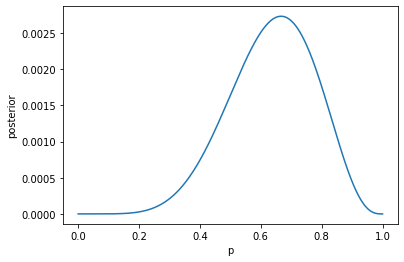

In [3]:
# Let's make a plot of the posterior to have some idea what it looks like
plt.plot(p_grid, posterior, '-')
plt.xlabel('p')
plt.ylabel('posterior')

## 3E1.

In [4]:
pprob = np.sum(posterior[np.where(p_grid < 0.2)])
print('{0:.2f}% posterior probability lies below p=0.2.'.format(pprob*100))

0.09% posterior probability lies below p=0.2.


In [5]:
# The same with the samples
sprob = sum(samples < 0.2) / 1e4
print('{0:.2f}% posterior probability (samples) is below p=0.2.'.format(sprob*100))

0.10% posterior probability (samples) is below p=0.2.


## 3E2.

In [6]:
pprob = np.sum(posterior[np.where(p_grid > 0.8)])
print('{0:.2f}% posterior probability lies above p=0.8.'.format(pprob*100))

12.03% posterior probability lies above p=0.8.


In [7]:
# The same with the samples
sprob = sum(samples > 0.8) / 1e4
print('{0:.2f}% posterior probability (samples) is above p=0.8.'.format(sprob*100))

12.09% posterior probability (samples) is above p=0.8.


## 3E3.

In [8]:
pprob = np.sum(posterior[np.where(p_grid < 0.8)]) - \
        np.sum(posterior[np.where(p_grid < 0.2)])
print('{0:.2f}% posterior probability lies between p=0.2 and p=0.8.'.format(pprob*100))

87.88% posterior probability lies between p=0.2 and p=0.8.


## 3E4.

In [9]:
# Loop through the posterior while summing up and comparing to the max. Get index
index = 0
partial_sum = 0
while partial_sum < 0.2:
    partial_sum += posterior[index]
    index += 1
    
# get the p value at the found index
p_value = p_grid[index - 1]
print('The value of p where 20% of the posterior lies below is {0:.2f}.'.format(p_value))

The value of p where 20% of the posterior lies below is 0.52.


In [10]:
# In fact, we could have done the same with the samples and determining the 20% quantile
quant = np.quantile(samples, 0.2)
print('The 20% quantile of the sampled data is {0:.2f}.'.format(quant))

The 20% quantile of the sampled data is 0.52.


## 3E5.

In [11]:
# Loop as before but from the back and move down
index = -1
partial_sum = 0
while partial_sum < 0.2:
    partial_sum += posterior[index]
    index -= 1
    
# get the p value at the found index
p_value = p_grid[index - 1]
print('The value of p where 20% of the posterior lies above is {0:.2f}.'.format(p_value))

The value of p where 20% of the posterior lies above is 0.76.


In [12]:
# Same comparison with quantiles as in 2E4.
quant = np.quantile(samples, 0.8)
print('The 80% quantile of the sampled data is {0:.2f}.'.format(quant))

The 80% quantile of the sampled data is 0.76.


## 3E6.
This is basically how the highest posterior density interval (HDPI) is defined. The calculations is a lot easier on the samples than on the posterior itself, so we'll focus here now on the samples.

In [13]:
pm.stats.hpd(samples, credible_interval=0.66)

array([0.51651652, 0.78878879])

## 3E7.

In [14]:
np.percentile(samples, [17, 83])

array([0.4984985 , 0.77294294])

## 3M1.

For this exercise we can simply copy Py code 3.27 and adjust the numbers to the n=15 and k=8. The prior can stay uniform (flat) as before, the grid approximation is already implemented.

Text(0, 0.5, 'posterior')

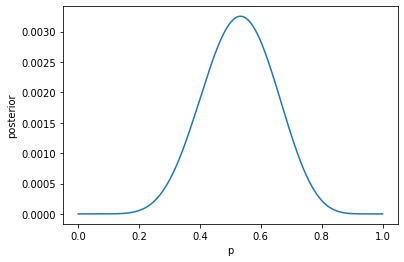

In [15]:
p_grid = np.linspace(0, 1, num=1000)
prior = np.ones(1000)
likelihood = stats.binom.pmf(k=8, n=15, p=p_grid)
posterior = likelihood * prior
posterior /= np.sum(posterior)

# Let's plot it to see what is going on
plt.plot(p_grid, posterior, '-')
plt.xlabel('p')
plt.ylabel('posterior')

## 3M2.

In [16]:
# Define a random number seed, this will be handy for later
np.random.seed(100)

# Draw 10000 samples from the posterior
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

# Calculate and print 90% HDPI
pm.stats.hpd(samples, credible_interval=0.9)

array([0.33733734, 0.72572573])

## 3M3.

First let's draw 10000 samples from a binomial distribution that have size 15 and the simulated samples as the probability. This is the same as was done in the book on page 66, Py code 3.26.

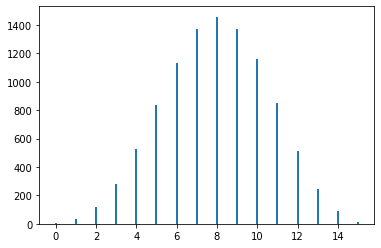

In [17]:
w = stats.binom.rvs(n=15, p=samples, size=int(1e4))

# also plot
plt.hist(w, bins=np.arange(-0.5, 16, 1), rwidth=0.1)
plt.show()

The histogram shows us that the most likely outcome is 8. Let's calculate the probability to have 8 out of 15 being water from these samples.

In [18]:
prob8 = np.sum(w==8) / 1e4
print('The probability to have 8 water in 15 tosses is {0:.2f}%.'.format(prob8*100))

The probability to have 8 water in 15 tosses is 14.58%.


## 3M4.

We can simply draw new samples with 9 tosses total and choose the probability from the samples, then find the probability of 6 tosses.

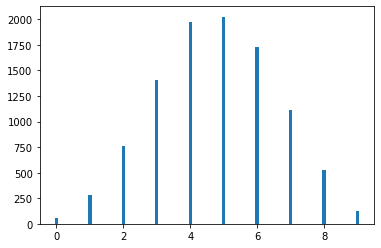

In [19]:
w2 = stats.binom.rvs(n=9, p=samples, size=int(1e4))

# also plot
plt.hist(w2, bins=np.arange(-0.5, 10, 1), rwidth=0.1)
plt.show()

In [20]:
prob6 = np.sum(w2==6) / 1e4
print('The probability to have 6 water in 9 tosses is {0:.2f}%.'.format(prob6*100))

The probability to have 6 water in 9 tosses is 17.29%.


## 3M5.

Text(0, 0.5, 'posterior')

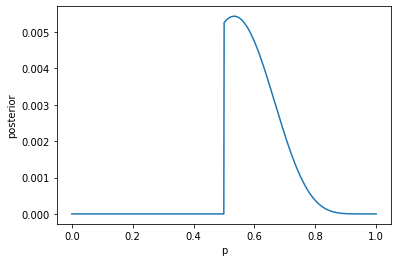

In [21]:
p_grid = np.linspace(0, 1, num=1000)
prior = np.ones(1000)
# set to 0 for p_grid < 0.5
prior[np.where(p_grid < 0.5)] = 0
likelihood = stats.binom.pmf(k=8, n=15, p=p_grid)
posterior = likelihood * prior
posterior /= np.sum(posterior)

# plot the posterior
plt.plot(p_grid, posterior, '-')
plt.xlabel('p')
plt.ylabel('posterior')

In [22]:
# Use the same seed as before to have a real comparison
np.random.seed(100)

# draw 10000 samples
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

### 90% HPDI

In [23]:
pm.stats.hpd(samples, credible_interval=0.9)

array([0.5005005 , 0.71271271])

Of course this interval is much higher and starts at p=0.5. The reason for this is that it is the narrowest interval possible and below p=0.5 nothing can be added.

### Posterior predictive check and probability to have 8/15 water tosses

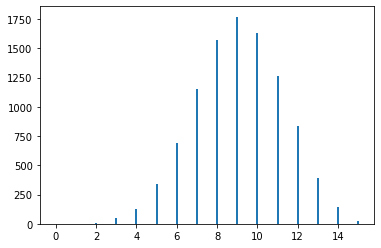

In [24]:
w = stats.binom.rvs(n=15, p=samples, size=int(1e4))

# also plot
plt.hist(w, bins=np.arange(-0.5, 16, 1), rwidth=0.1)
plt.show()

In [25]:
prob8 = np.sum(w==8) / 1e4
print('The probability to have 8 water in 15 tosses is {0:.2f}%.'.format(prob8*100))

The probability to have 8 water in 15 tosses is 15.69%.


The chance is slightly higher than before, it increased from 14.6% to 15.7%. In fact, the histogram is also slightly skewed towards higher values. This makes sense when looking at the plot of the posterior before.

### Repeat and check probability for 6 out of 9 tosses

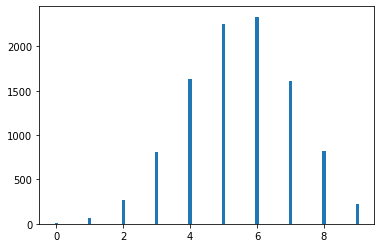

In [26]:
w2 = stats.binom.rvs(n=9, p=samples, size=int(1e4))

# plot
plt.hist(w2, bins=np.arange(-0.5, 10, 1), rwidth=0.1)
plt.show()

In [27]:
prob6 = np.sum(w2==6) / 1e4
print('The probability to have 6 water in 9 tosses is {0:.2f}%.'.format(prob6*100))

The probability to have 6 water in 9 tosses is 23.35%.


This probability went up significantly from 17.3% to 23.4%. These are just numbers though. The really impressive picture is the histogram. Clearly, with the new prior, 6 waters out of 9 tosses is not the most probably outcome, while it was 5 out of 9 tosses before. This makes sense and is based on the fact that the distribution is more skewed now due to the new prior.

## 3M6.

In [28]:
# set the p_grid and prior before outside the following subroutine
p_grid = np.linspace(0, 1, num=1000)
prior = np.ones(1000)

# define the number of samples to draw for comparisons
n_samples = 10000

# first let's write a subroutine that calculates the 99% percentile for n tosses
def calc_99pi(n):
    # calculate k given a certain probability, let's assume p=0.7
    k = int(0.7 * n)
    likelihood = stats.binom.pmf(k=k, n=n, p=p_grid)
    posterior = likelihood * prior
    posterior /= np.sum(posterior)
    
    # set numpy random seed and draw samples
    np.random.seed(100)
    # draw samples
    samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)
    
    # calculate 99% percentile
    perc = np.percentile(samples, [0.5, 99.5])
    
    # calculate and return the width of the 99% percentile
    return perc[1] - perc[0]

In [29]:
# now we can test above subroutine for a few values
width = calc_99pi(100)
print('100 tosses will result in an interval width of {0:.2f}.'.format(width))

100 tosses will result in an interval width of 0.23.


In [30]:
width = calc_99pi(1000)
print('1000 tosses will result in an interval width of {0:.2f}.'.format(width))

1000 tosses will result in an interval width of 0.07.


In [31]:
width = calc_99pi(3000)
print('3000 tosses will result in an interval width of {0:.2f}.'.format(width))

3000 tosses will result in an interval width of 0.04.


Looks like it's somewhere between 1000 and 3000 tosses. Let's go a bit overboard here and simulate it for every number between 1000 and 3000, then check at how many tosses we hit the width of 99% percentile interval is for the first time <0.05.

Text(0, 0.5, 'Width of 99% percentile interval')

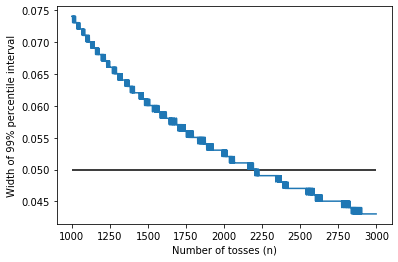

In [32]:
test_grid = np.arange(1000, 3000, 1)

# get all the widths
widths = np.empty(len(test_grid))
for index, nsamples in enumerate(test_grid):
    widths[index] = calc_99pi(nsamples)
    
# plot the width to check it out and plot a vertical line at p=0.05
plt.plot(test_grid, widths, '-')
plt.hlines(0.05, xmin=1000, xmax=3000)
plt.xlabel('Number of tosses (n)')
plt.ylabel('Width of 99% percentile interval')

In [33]:
# now go through the list and find where we are the first time below 0.5
test_grid[np.min(np.where(widths < 0.05))]

2202

This means that after 2202 samples the width of 99% percentile interval is smaller than 0.05.

## Hard: data from Py code 3.28

In [34]:
birth1 = np.array([1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,
                   0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,
                   0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,
                   1,1,1,1,1,0,0,1,0,1,1,0,1,0,1,1,1,0,1,1,1,1])
birth2 = np.array([0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,
                   1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,
                   1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,
                   0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,1,1,1,0,0,0,0])

## 3H1.

In [35]:
# specify the grid and the prior
p_grid = np.linspace(0, 1, num=1000)
prior = np.ones(1000)

The question asks about the probability of giving birth to a boy. This means either birth is fine, we can sum them together. This means our binomial distribution (still binomial!) is going to have a total of 200 draws, the sum of birth1 + birth2 are the boys that are born.

Text(0, 0.5, 'Density')

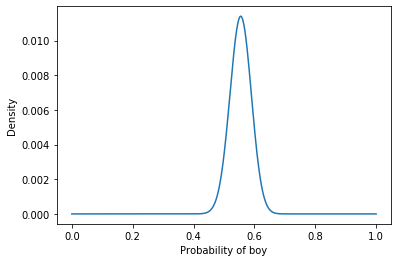

In [36]:
number_draws = len(birth1) + len(birth2)
number_boys = np.sum(birth1) + np.sum(birth2)
likelihood = stats.binom.pmf(k=number_boys, n=number_draws, p=p_grid)

# calculate the posterior and norm it
posterior = prior * likelihood
posterior /= np.sum(posterior)

# Plot the posterior
plt.plot(p_grid, posterior, '-')
plt.xlabel('Probability of boy')
plt.ylabel('Density')

The parameter that maximizes the distribution is the *maximum a posteriori* (MAP) estimate, see chapter 3.2.3, Py Code 3.14. We can calculate the MAP for above posterior.

In [37]:
prob_map = p_grid[np.argmax(posterior)]
print('The MAP of the posterior is {0:.4f}'.format(prob_map))

The MAP of the posterior is 0.5546


## 3H2.

In [38]:
# first select a random seed
np.random.seed(42)

# draw the samples
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

# Create a function to plot and print the HPDI for a given confidence interval
def calc_hdpi(ci):
    value = pm.stats.hpd(samples, credible_interval=ci)
    print('The {0:.0f}% HDPI goes from p={1:.2f} to p={2:.2f}.'.format(ci*100, value[0], 
                                                                       value[1]))

# now use the defined function with the values in the book
calc_hdpi(0.5)
calc_hdpi(0.89)
calc_hdpi(0.97)

The 50% HDPI goes from p=0.53 to p=0.57.
The 89% HDPI goes from p=0.50 to p=0.61.
The 97% HDPI goes from p=0.48 to p=0.63.


## 3H3.

Text(0, 0.5, 'Frequency')

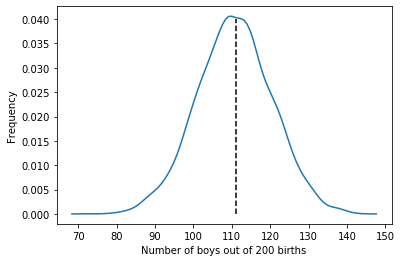

In [39]:
# simulate the data with the samples that we've drawn above to simulate the data
w = stats.binom.rvs(n=200, p=samples, size=int(1e4))

# now plot a kernel density of these simulations
sns.kdeplot(w)
# plot a vertical line at 111 births, which is what our data above have as the sum
plt.vlines(111, 0, 0.04, linestyle='--')
# labels
plt.xlabel('Number of boys out of 200 births')
plt.ylabel('Frequency')

The model seems to fit the data very well, the average distribution as shown in the plot above is basically what we had from the sum above, i.e., 111 boys out of 200 births.

## 3H4.

Median value of model at 55 boys per 100 births.
Sum of boys in birth1 array: 51


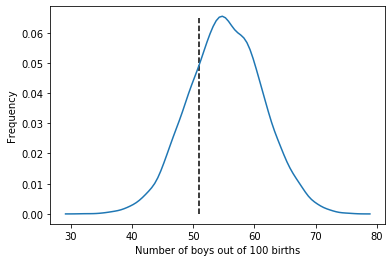

In [40]:
# simulate 100 births usign the previously defined samples based on the whole dataset
w = stats.binom.rvs(n=100, p=samples, size=int(1e4))

# plot the results as a kde
sns.kdeplot(w)
# plot a vertical line at the sum of birth1
plt.vlines(np.sum(birth1), 0, 0.065, linestyle='--')
# labels
plt.xlabel('Number of boys out of 100 births')
plt.ylabel('Frequency')

# calculate and print the max of the model
print('Median value of model at {:d} boys per 100 births.'.format(int(np.median(w))))
print('Sum of boys in birth1 array: {:d}'.format(np.sum(birth1)))

The model overestimates the number of boys for the first child by 4.

## 3H5.

In [41]:
# First let's count the number of girls in the birth1 array
number_girls_b1 = np.sum(birth1 == 0)
print('Number of girls in first round of births: {:d}'.format(number_girls_b1))

Number of girls in first round of births: 49


In [42]:
# Calculate how many boys follow these girls in birth1
num_boys_after_girls = np.sum(birth2[np.where(birth1==0)])
print('Number of boys following birhts of girls: {:d}'.format(num_boys_after_girls))

Number of boys following birhts of girls: 39


Model predicts that 27 boys should be born in birth2 following a girl in birth1


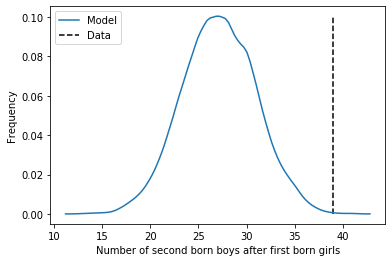

In [43]:
# now we simulate that many births 10000 times, again weighted by our samples
w = stats.binom.rvs(n=number_girls_b1, p=samples, size=int(1e4))

# now plot a kde for simulations along with a line on how many boys followed girls
sns.kdeplot(w, label='Model')
plt.vlines(num_boys_after_girls, 0, 0.1, linestyle='--', label='Data')

# labels
plt.xlabel('Number of second born boys after first born girls')
plt.ylabel('Frequency')
plt.legend(loc='upper left')

# print out the median of the model
print('Model predicts that {:d} boys should be born in birth2 following a girl in '
      'birth1'.format(int(np.median(w))))

The model only predicts the birth of 27 boys following girls in birth 1, however, in fact there were 39 boys born following girls. This means that the data are in fact not independant.